# Lasso assignment
## Yoav Ram

First, we load the diabetes dataset, and try to predict the progression of the diabetes condition from several features, including age, blood pressure, and some blood serum features.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Let's load the data and plot it.

In [2]:
df = load_diabetes(as_frame=True)['frame']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


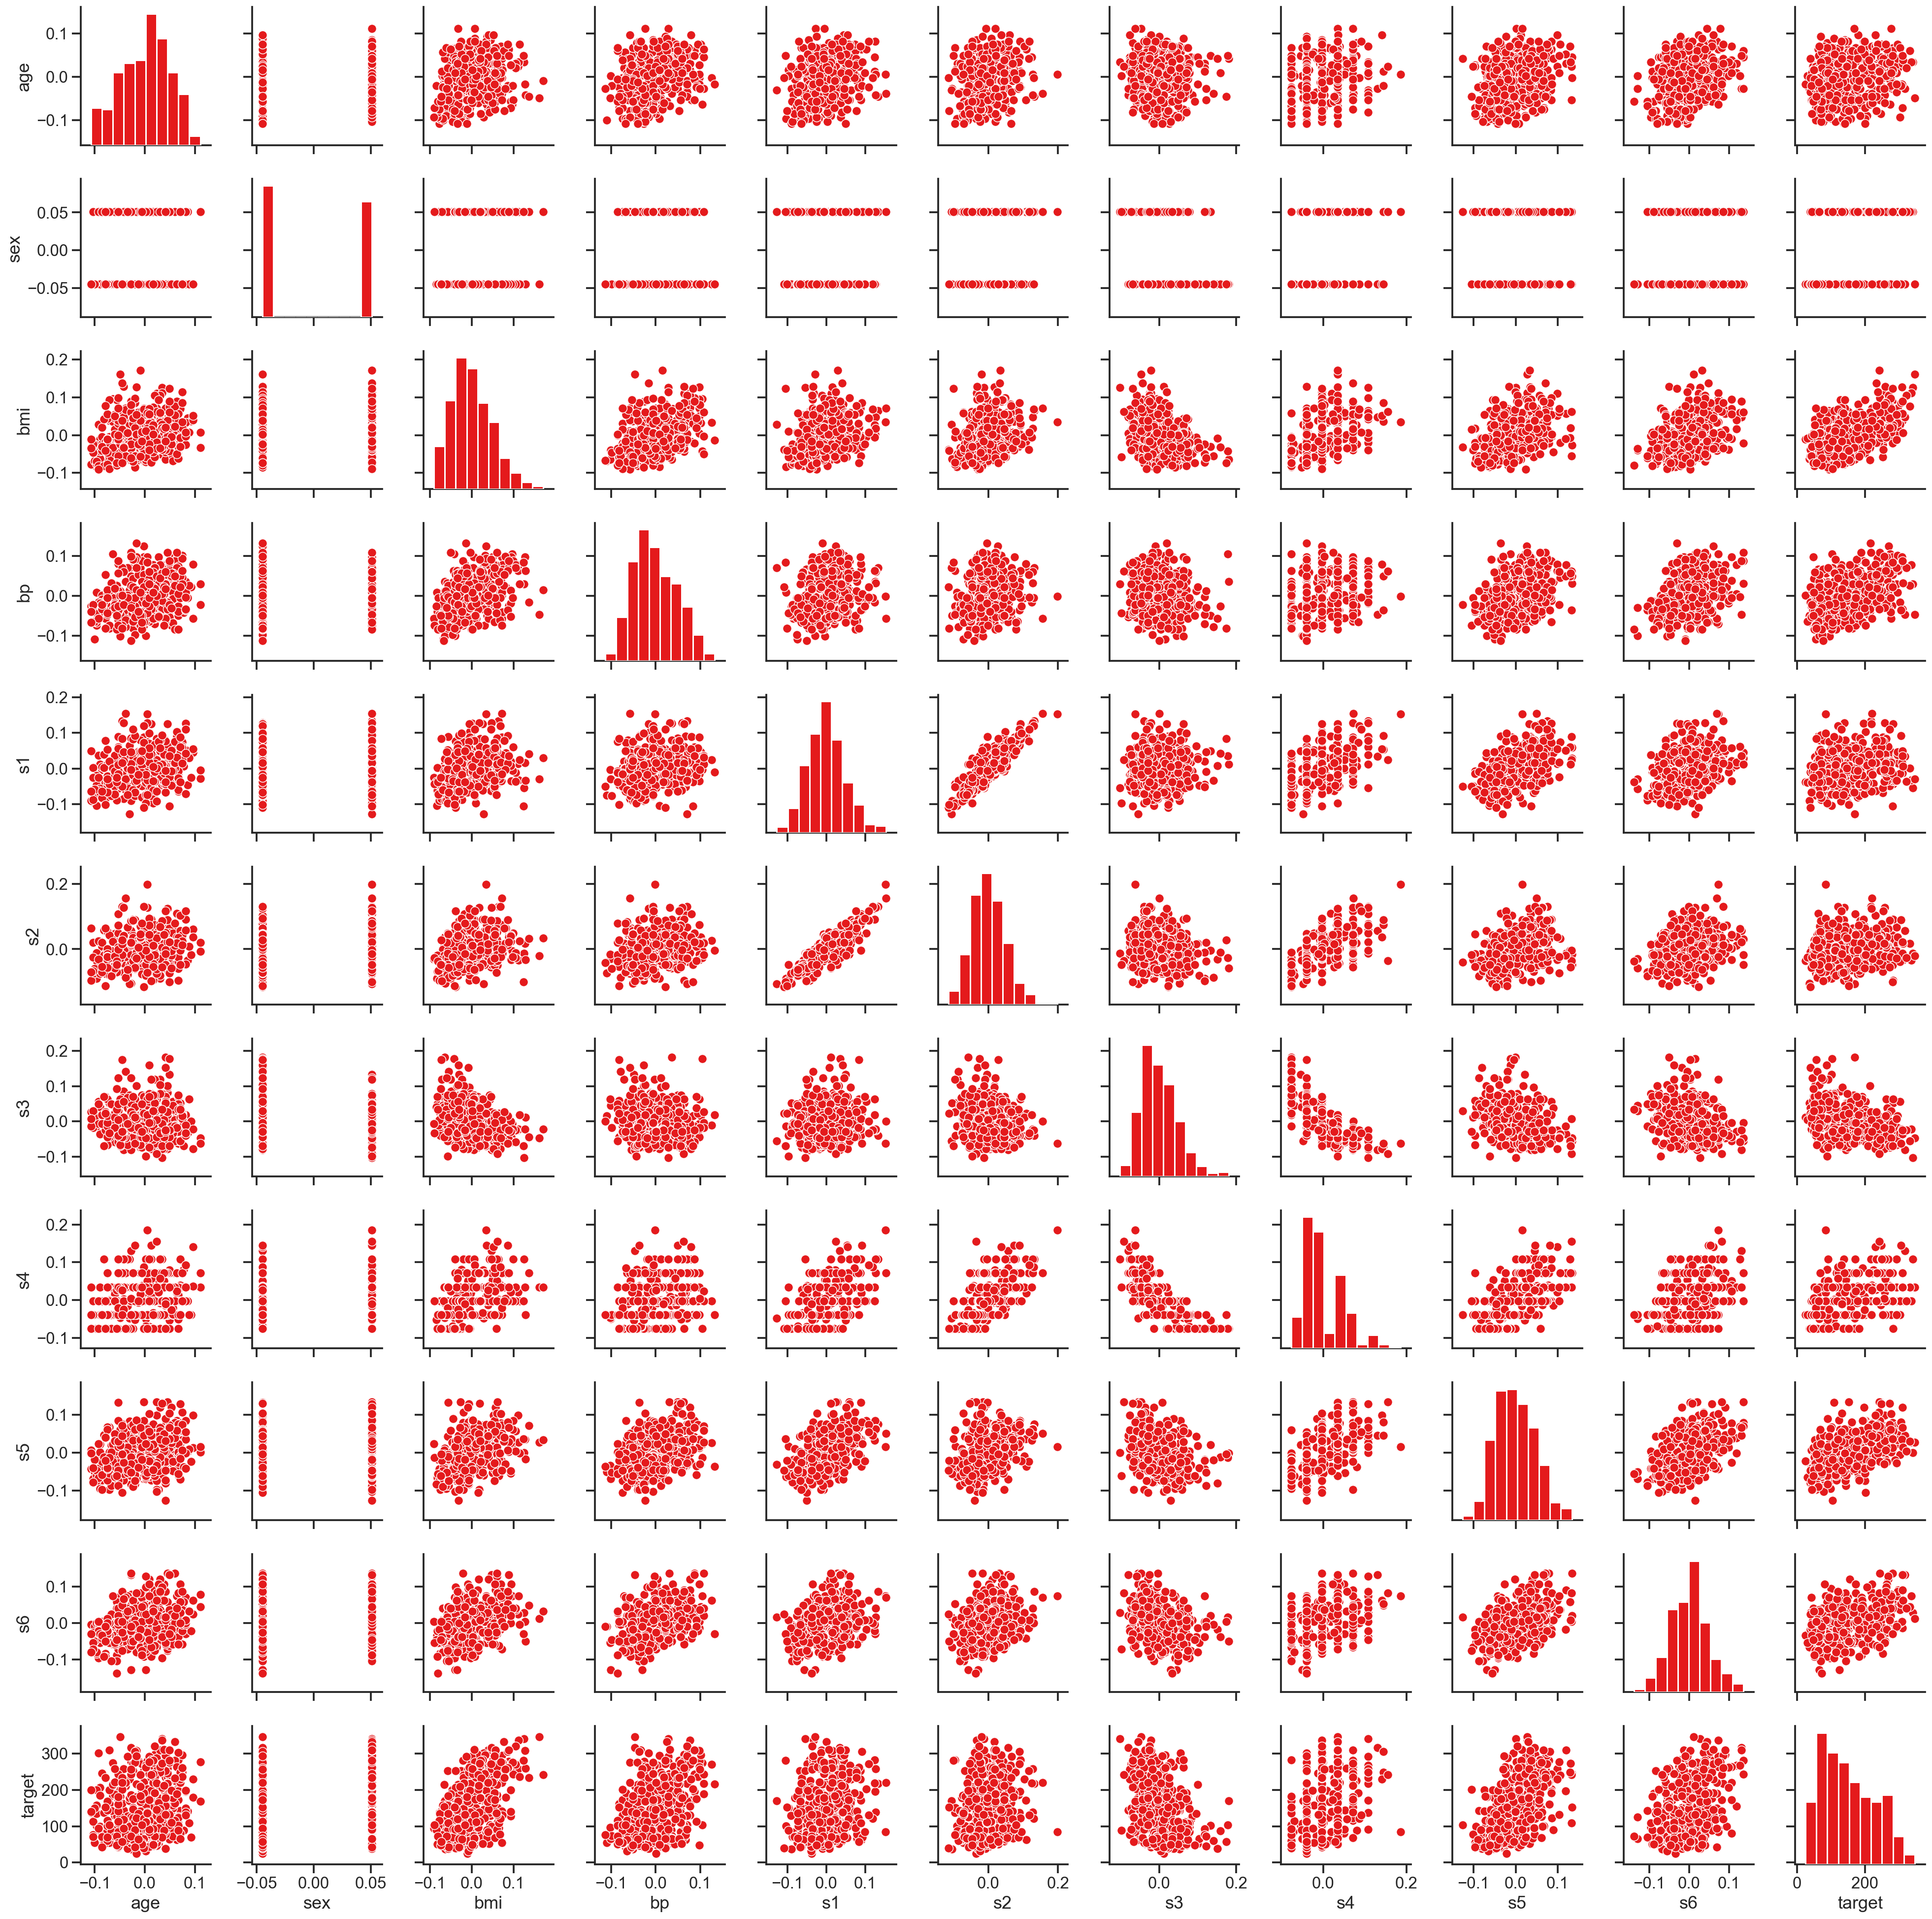

In [2]:
sns.pairplot(df)

We extract the data to arrays and split it.

In [3]:
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X = df[feature_names]
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Linear regression

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Score:", reg.score(X_test, y_test))

Score: 0.5114540344577096


## Lasso regression
Now experiment with the Lasso model from the `linear_model` package ([Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)): least absolute shrinkage and selection operator).

Lasso is a linear model that performs _regularization_: avoiding giving too much weight to any single feature. 
This is done by minimizing not just the sum of residual squares between the model predictions and the observed values (the fit), but also the sum of the absolute values of the model coefficients (the penalty):

$$
\hat{y} = a_0 + a_1 x_1 + \ldots + a_m x_m \\
f(a_1, \ldots, a_m) = \frac{1}{2n} \sum_{i=1}^{n}{(\hat{y}_i - y_i)^2} + \alpha \sum_{j=1}^{m} |a_j|
$$

This is useful for feature selection, that is, finding features that are less important and therefore get a zero coefficeint. 
Thus, is increases prediction accuracy as well as interpretability of the linear model.

A meta-parameter $\alpha$ is used to weight the penalty relative to the fit: the higher $\alpha$, the more weight is given to the penalty.

## Ex 1
**Perform the analysis with a Lasso model**.

Add plots to analyse the regressor. Here I created a prediction plot on the left, which compares the predicted and real values of the test set; and on the right a bar plot of the feature importance, measured by the coefficients.

**Reminder**
- Edit cell by double clicking
- Run cell by pressing _Shift+Enter_
- Get autocompletion by pressing _Tab_
- Get documentation by pressing _Shift+Tab_

Lasso model score: 0.49


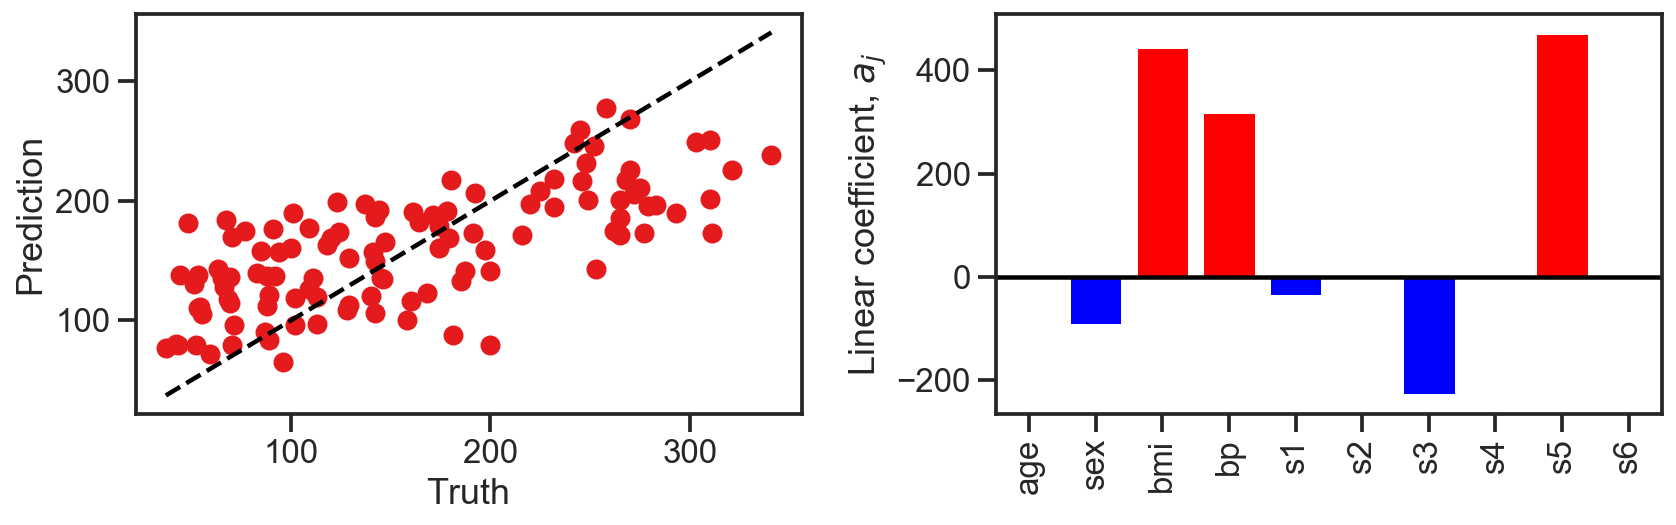

In [7]:
from sklearn.linear_model import Lasso

α = 0.1 # which α to use? try LassoCV
reg = Lasso(α)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)
score = reg.score(X_test, y_test)
print('Lasso model score: {:.2f}'.format(score))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
ax.plot(y_test, y_hat, 'o')
yline = np.linspace(y_test.min(), y_test.max())
ax.plot(yline, yline, color='k', ls='--')
ax.set_xlabel("Truth")
ax.set_ylabel("Prediction")

ax = axes[1]
coefs = reg.coef_
coefs_idx = np.arange(len(coefs))
pos_coefs = coefs > 0
neg_coefs = coefs < 0

ax.bar(coefs_idx[pos_coefs], coefs[pos_coefs], color='r')
ax.bar(coefs_idx[neg_coefs], coefs[neg_coefs], color='b')
ax.axhline(0, color='k')
ax.set_ylabel('Linear coefficient, $a_j$');
ax.set_xticks(coefs_idx)
ax.set_xticklabels(feature_names, rotation=90)
ax.set_xlim(-0.5, coefs_idx.max()+0.5)

fig.tight_layout()

## Ex 2
**Bonus**:
to avoid choosing your own $\alpha$, try the `LassoCV` model (from scikit-learn) with the `AlphaSelection` visualization (from yellowbrick).

LassoCV α: 0.054
LassoCV model score: 0.50


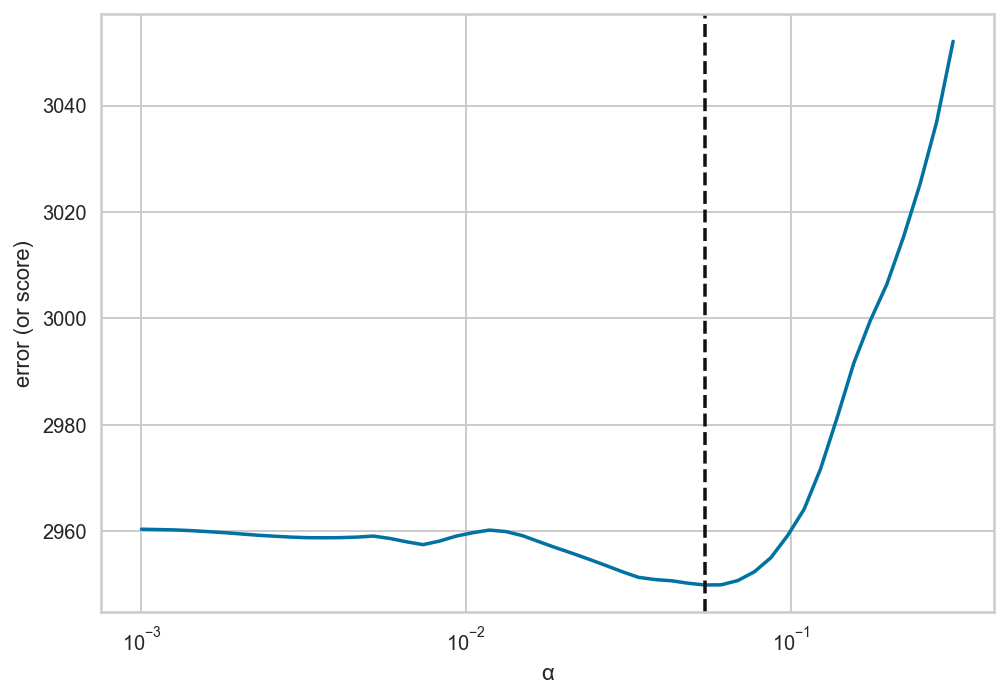

In [9]:
from sklearn.linear_model import LassoCV
import yellowbrick as yb

αs = np.logspace(-3, -0.5)
viz = yb.regressor.AlphaSelection(LassoCV(alphas=αs))
viz.fit(X_train, y_train)
viz.finalize()
plt.xscale('log')
plt.title('')
plt.xlabel('α')
plt.legend().set_visible(False)

print('LassoCV α: {:.2g}'.format(viz.estimator.alpha_))
print('LassoCV model score: {:.2f}'.format(viz.score(X_test, y_test)))